# Лабораторная работа № 3.3

### Задача:

Для таблично заданной функции путем решения нормальной системы МНК найти
приближающие многочлены a) 1-ой и б) 2-ой степени. Для каждого из приближающих
многочленов вычислить сумму квадратов ошибок. Построить графики приближаемой
функции и приближающих многочленов

In [1]:
import math

In [2]:
Table = [(-3, 0.04979), (-2, 0.13534), (-1, 0.36788), (0, 1), (1, 2.7183), (2, 7.3891)]

| Table |||
| :-------: | :-------: | :-------: |
| $$ i $$ | $$ x_{i} $$ | $$ y_{i} $$ |
| 0 | -3 | 0.04979 | 
| 1 | -2 | 0,13534 | 
| 2 | -1 | 0.36788 | 
| 3 | 0 | 1 |
| 4 | 1 | 2.7183 |
| 5 | 2 | 7.3891  |

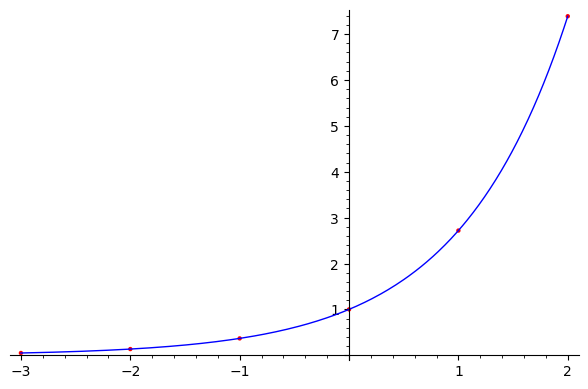

In [3]:
list_plot(Table, color = 'red') + \
plot(e**x, (-3, 2))

### Метод наименьших квадратов (МНК)

$\varphi(x, A) = \sum_{j=0}^{m} a_j \varphi_j(x) $

$y = (y_0\ y_1\ ...\  y_n)^T$

$A = (a_0\ a_1\ ...\  a_m)^T$

$
\Phi = 
\begin{pmatrix}
\varphi_0(x_0) & \varphi_1(x_0) & \cdots & \varphi_m(x_0)\\
\varphi_0(x_1) & \varphi_1(x_1) & \cdots & \varphi_m(x_1)\\
\vdots & \cdots & \ddots & \vdots \\
\varphi_0(x_n) & \varphi_1(x_n) & \cdots & \varphi_m(x_n)
\end{pmatrix}$

$Q(A) = \sum^{n}_{i=0} (\varphi(x_i, A)-y_i)^2$  -->  $\underset{A}{min}$

$Q(A) = (\Phi A - y, \Phi A - y) = A^T \Phi^T \Phi A - 2A^T \Phi^T y + y^T y$ -->  $\underset{A}{min}$

$\nabla Q(A) = \Phi^T \Phi A - \Phi^T y = 0$

$(\Phi^T\Phi)A = \Phi^Ty\ |=> A$ (решение СЛАУ)

In [4]:
class LSA:
    
    def __init__(self, table, function, m):
        self.table = table
        self.function = function
        self.m = m
        self.a = [1 for _ in range(m + 1)]
        
        matrix = [[function(table[i][0], j) for j in range(m + 1)] for i in range(len(table))]
        tr_matrix = self._transpose_matrix(matrix)
        G = self._prod_matrix(tr_matrix, matrix)
        y = [[table[i][1]] for i in range(len(table))]
        Y = self._prod_matrix(tr_matrix, y)
        self.a = self._SoLE(G, Y)
        
    def _SoLE(self, A, b, steps = 9):
        import numpy
        return numpy.linalg.solve(A, [i[0] for i in b])
        
    def _sum_vectors(self, v1, v2):
        return [v1[i] + v2[i] for i in range(len(v1))]
    
    def _div_vectors(self, v1, v2):
        return [v1[i] - v2[i] for i in range(len(v1))]
    
    def _prod_matrix_vector(self, m, v):
        result = [sum(m[i][j] * v[j] for j in range(len(v))) for i in range(len(m))]
        return result
    
    def _prod_matrix(self, m1, m2):
        result = [[sum(m1[i][k] * m2[k][j] for k in range(len(m2))) for j in range(len(m2[0]))] for i in range(len(m1))]
        return result
    
    def _transpose_matrix(self, m):
        result = [[m[j][i] for j in range(len(m))] for i in range(len(m[0]))]
        return result
    
    def __call__(self, x):
        return sum(self.a[i] * self.function(x, i) for i in range(self.m + 1))
    
    def sum_of_square_errors(self):
        return sum((self.table[i][1] - self(self.table[i][0])) ** 2 for i in range(len(self.table)))
    
    def poly_text(self):
        return ' + '.join(["{:.3f}".format(self.a[i]),
                           "{:.3f}x".format(self.a[i]),
                           "{:.3f}x^{}".format(self.a[i], i)]
                          [i if i < 2 else 2] for i in range(len(self.a)))

Приближающий многочлен 1-ой степени:

In [5]:
Var = LSA(Table, (lambda x, i : x**i) , 1)

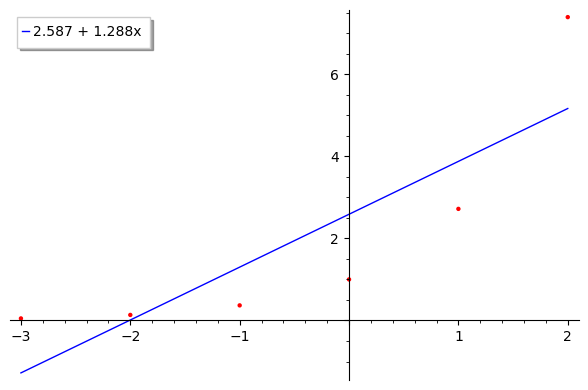

In [6]:
plot(Var, (-3, 2), legend_label = Var.poly_text()) + \
list_plot(Table, color='red')

In [7]:
Var.sum_of_square_errors()

11.454860640333333

Приближающий многочлен 2-ой степени:

In [8]:
Var = LSA(Table, (lambda x, i : x**i) , 2)

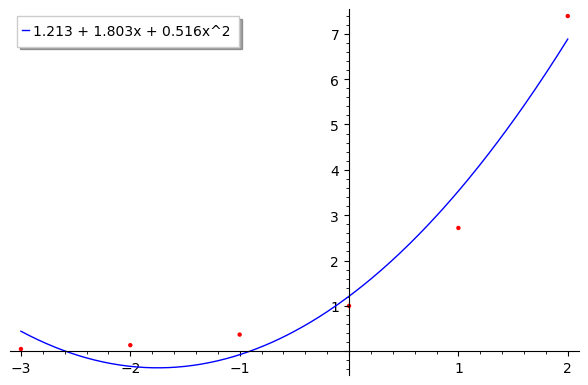

In [9]:
plot(Var, (-3, 2), legend_label = Var.poly_text()) + \
list_plot(Table, color='red')

In [10]:
Var.sum_of_square_errors()

1.5330046271892857

Ряд Фурье:

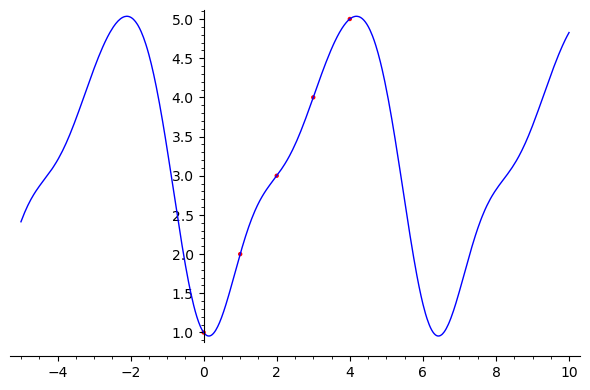

In [11]:
Table = [(i, i + 1) for i in range(0, 5)]
Var = LSA(Table, (lambda x, i : [math.cos((i+1)//2 * x), math.sin((i+1)//2 * x)][1 - i % 2] if i > 0 else 1) , 5)

plot(Var, (-5, 10), legend_label = "") + \
list_plot(Table, color='red')

In [12]:
Var.sum_of_square_errors()

1.195617309475596e-30

Облако точек вдоль прямой:

[-12.92489852  -0.22823939   9.08872376]


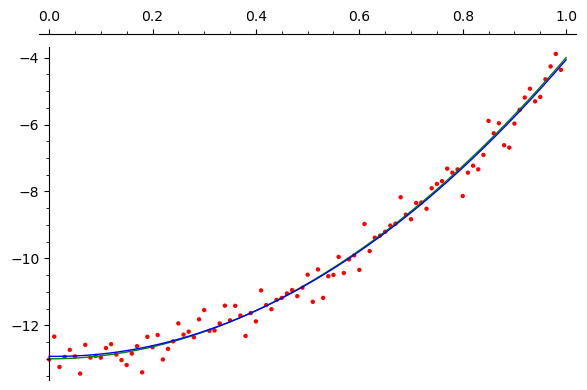

In [13]:
import random as rand

Table = [(i/100, 9 * (i/100)**2 - 13 + rand.uniform(0, rand.uniform(-1, 1))) for i in range(0, 100)]
Var = LSA(Table, (lambda x, i : x**i ) , 2)

print(Var.a)

plot(9*x**2 - 13, (0, 1), color='green') + \
plot(Var, (0, 1), legend_label = "") + \
list_plot(Table, color='red')

In [14]:
Var.sum_of_square_errors()

10.709137588266435